In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Utilities

In [2]:
def plot_cm_display(y_true: np.array, y_pred: np.array) -> None:
    cm = confusion_matrix(y_true, y_pred)
    
    #plt.figure(figsize=(20, 8))
    #plt.title('Confusion Matrix\n')
    CM = ConfusionMatrixDisplay(cm)
    CM.plot()
    #sns.heatmap(cm, cmap='vlag', annot=True, fmt='d', cbar=False)
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.show()


def plot_lc(history: dict, metrics: list = ['loss', 'accuracy']) -> None:
    plt.figure(figsize=(20, 8))
    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.title(f'Learning curve for {metric}\n')
        plt.plot(history[metric], label='train')
        plt.plot(history[f'val_{metric}'], label='val')
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        if metric == 'accuracy':
            plt.ylim(0,1.1)
    plt.show()

In [3]:
def create_ellips(center = (0,0), radius = (1,1), num_points= 1_000, noise_factor=1):
    x0, y0 = center
    try:
        a, b = radius # tuple given => ellips
    except:
        a = b = radius # number given=> circle
        
    theta = np.random.uniform(0, 2*np.pi, size=num_points)
    x = (x0 + np.cos(theta) * a) + noise_factor * np.random.normal(0, 1, size=num_points)
    y = (y0 + np.sin(theta) * b) + noise_factor * np.random.normal(0, 1, size=num_points)
    
    return np.column_stack((x, y))

# Data

In [4]:
'''
https://scikit-learn.org/stable/auto_examples/cluster/
plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
'''
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

centers = 2
n_samples = 4_000
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

transformation_2 = [[1, 0], [0, 1]]

X, y = make_blobs(centers=centers, n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs

'''
X_aniso_2 = 20+np.dot(X, transformation_2)
X_cir = np.concatenate([[(np.sin(X_aniso_2[:,1])*np.abs(X_aniso_2[:,0]))],[(np.cos(X_aniso_2[:,1])*np.abs(X_aniso_2[:,0]))]],axis=1).reshape(-1,2)
'''
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, # 0.25 
                                                    random_state=random_state) # 4 arbirary , can be any integer

print(np.unique(y))

[0 1]


In [5]:
N_ell = 1_000
X_ell = np.concatenate([create_ellips(radius=(10,20),noise_factor=0.5, num_points=N_ell)
                        , create_ellips(radius=(5,2),noise_factor=0.5, num_points=N_ell)])
y_ell = np.concatenate([np.zeros(N_ell),np.ones(N_ell)])

X_train_ell, X_test_ell, y_train_ell, y_test_ell = train_test_split(X_ell, y_ell,
                                                    test_size=0.25, # 0.25 
                                                    random_state=random_state) # 4 arbirary , can be any integer

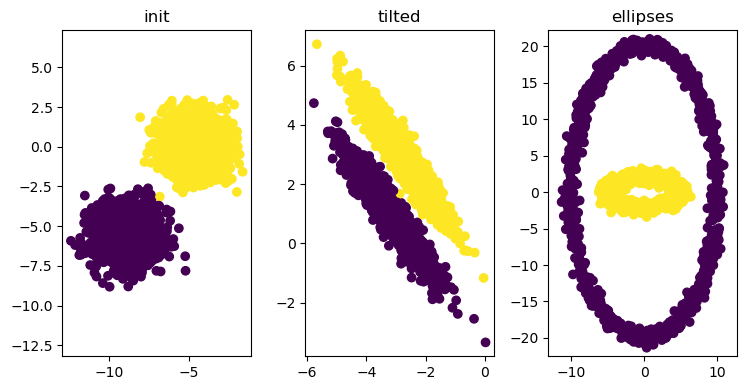

In [6]:
N_COL = 4
plt.figure(figsize= (10,4) )
plt.subplot(1,N_COL,1)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("init")
plt.axis("equal")

plt.subplot(1,N_COL,2)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
plt.title("tilted")
plt.axis("equal")


plt.subplot(1,N_COL,3)
plt.scatter(X_ell[:,0], X_ell[:,1], c= y_ell)
plt.title('ellipses')
plt.axis("equal")

plt.tight_layout()
plt.show()


# NN

In [7]:
import tensorflow as tf
import keras
from keras.layers import Dense, InputLayer

tf.random.set_seed(
    random_state
)

In [8]:
def simple_model_definition_no_hidden():
    N_CLASSES = 1           ## number of classes to predict= binary classification
    INPUT_SHAPE = (2,)      ## shape of X_train
    #NUMBER_OF_NEURONS = 3   ## number of neurons for a layer
    
    
    simple = keras.Sequential([
        ### not required,
        ### but suggested to impose a fixed shape as input 
        InputLayer(shape=INPUT_SHAPE)

        ### hidden layers

        ### output layer
        ,Dense(units=N_CLASSES
               ,activation= "sigmoid" ## sigmoid because classification: value between 0 and 1
               ,name ="my-output-layer"
              )
    ])

    ### "compile"/compress model = MANDATORY
    simple.compile(
        optimizer=tf.keras.optimizers.Adam(), #'adam', ## use this by default
        loss="binary_crossentropy", ## binary classification
        metrics=['accuracy'] ## additional metric
    )
    return simple
    

In [ ]:
def simple_model_definition():
    N_CLASSES = 1           ## number of classes to predict= binary classification
    INPUT_SHAPE = (2,)      ## shape of X_train
    NUMBER_OF_NEURONS = 3   ## number of neurons for a layer
    
    
    simple = keras.Sequential([
        ### not required,
        ### but suggested to impose a fixed shape as input 
        InputLayer(shape=INPUT_SHAPE)

        ### hidden layers
        ,Dense(units=64
               ,activation = "tanh" # (sigmoide), relu in hidden layer
               , name="my-first-hidden-layer"
              )
        
        ,Dense(units = 25
               ,activation = "relu"
               ,name = "my-second-hidden-layer"
              )

        ### output layer - last layer
        ,Dense(units=N_CLASSES
               ,activation= "sigmoid" ## sigmoid because classification: value between 0 and 1
               ,name ="my-output-layer"
              )
    ])

    ### "compile"/compress model = MANDATORY
    simple.compile(
        optimizer=tf.keras.optimizers.Adam(), #'adam', ## use this by default
        loss="binary_crossentropy", ## binary classification
        metrics=['accuracy'] ## additional metric
    )
    return simple
    

In [10]:
### more dynamic function for ease of demonstrations
### think different functions of model definition above

def mymodel(input_shape: tuple[int,...] = (2,)
            , output: int = 1
            , hidden_shape: tuple[int,2] = (0,0) 
            , activation: str = 'relu' ## 'tanh','linear','sigmoid'
           ) -> keras.Sequential:
    
    '''
    classification model
    
    hidden_shape[0] = number of hidden layers
    hidden_shape[1] = number of units in each layer
    
    '''
    
    output_activation = 'sigmoid' if output==1 else 'softmax'
    loss = 'binary_crossentropy'  if output==1 else 'sparse_categorical_crossentropy'
    
    
    
    hidden_lst = [ Dense(units=hidden_shape[1], activation=activation) for _ in range(hidden_shape[0])] 
    
    seq_lst =( [InputLayer(shape=input_shape),]             ## input
              + hidden_lst                                  ## hidden layers
              +[Dense(units=output, activation=output_activation)]  ## output
             )
    
    model = keras.Sequential(seq_lst)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(), #'adam', ## use this by default
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model
    

In [11]:
model = simple_model_definition_no_hidden()

model.fit(X_train, y_train, batch_size=8, validation_split=0.15, epochs=10 )


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2655 - loss: 2.0024 - val_accuracy: 0.3578 - val_loss: 1.8006
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3722 - loss: 1.5925 - val_accuracy: 0.4133 - val_loss: 1.4082
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4333 - loss: 1.2138 - val_accuracy: 0.4578 - val_loss: 1.0447
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4929 - loss: 0.8828 - val_accuracy: 0.5111 - val_loss: 0.7459
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5529 - loss: 0.6271 - val_accuracy: 0.6111 - val_loss: 0.5302
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.4515 - val_accuracy: 0.9333 - val_loss: 0.3888
Epoch 7/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9686 - loss: 0.3379 - val_accuracy: 0.9889 - val_loss: 0.2980
Epoch 8/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.2639 - val_accuracy: 0.

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ my-output-layer (Dense)   │ (None, 1)           │          3 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [13]:
history = model.history.history
display(history)

{'accuracy': [0.26549020409584045,
  0.37215685844421387,
  0.4333333373069763,
  0.4929411709308624,
  0.5529412031173706,
  0.8007842898368835,
  0.9686274528503418,
  0.9882352948188782,
  0.9956862926483154,
  0.99647057056427],
 'loss': [2.002429246902466,
  1.5925222635269165,
  1.213788628578186,
  0.8827793002128601,
  0.6271417737007141,
  0.45150989294052124,
  0.3378991186618805,
  0.2639015018939972,
  0.21366320550441742,
  0.1779012382030487],
 'val_accuracy': [0.35777777433395386,
  0.41333332657814026,
  0.4577777683734894,
  0.5111111402511597,
  0.6111111044883728,
  0.9333333373069763,
  0.9888888597488403,
  0.9977777600288391,
  0.995555579662323,
  0.995555579662323],
 'val_loss': [1.8006008863449097,
  1.4082365036010742,
  1.0447397232055664,
  0.7458579540252686,
  0.5302430391311646,
  0.38880446553230286,
  0.2979995608329773,
  0.2378423511981964,
  0.19604739546775818,
  0.16566713154315948]}

In [28]:
model.fit(X_train, y_train, batch_size=8, validation_split=0.15, epochs=5 )

Epoch 1/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.1514 - val_accuracy: 0.9956 - val_loss: 0.1427
Epoch 2/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9961 - loss: 0.1310 - val_accuracy: 0.9956 - val_loss: 0.1249
Epoch 3/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.1148 - val_accuracy: 0.9956 - val_loss: 0.1106
Epoch 4/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9965 - loss: 0.1018 - val_accuracy: 0.9956 - val_loss: 0.0990
Epoch 5/5
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9965 - loss: 0.0911 - val_accuracy: 0.9956 - val_loss: 0.0894


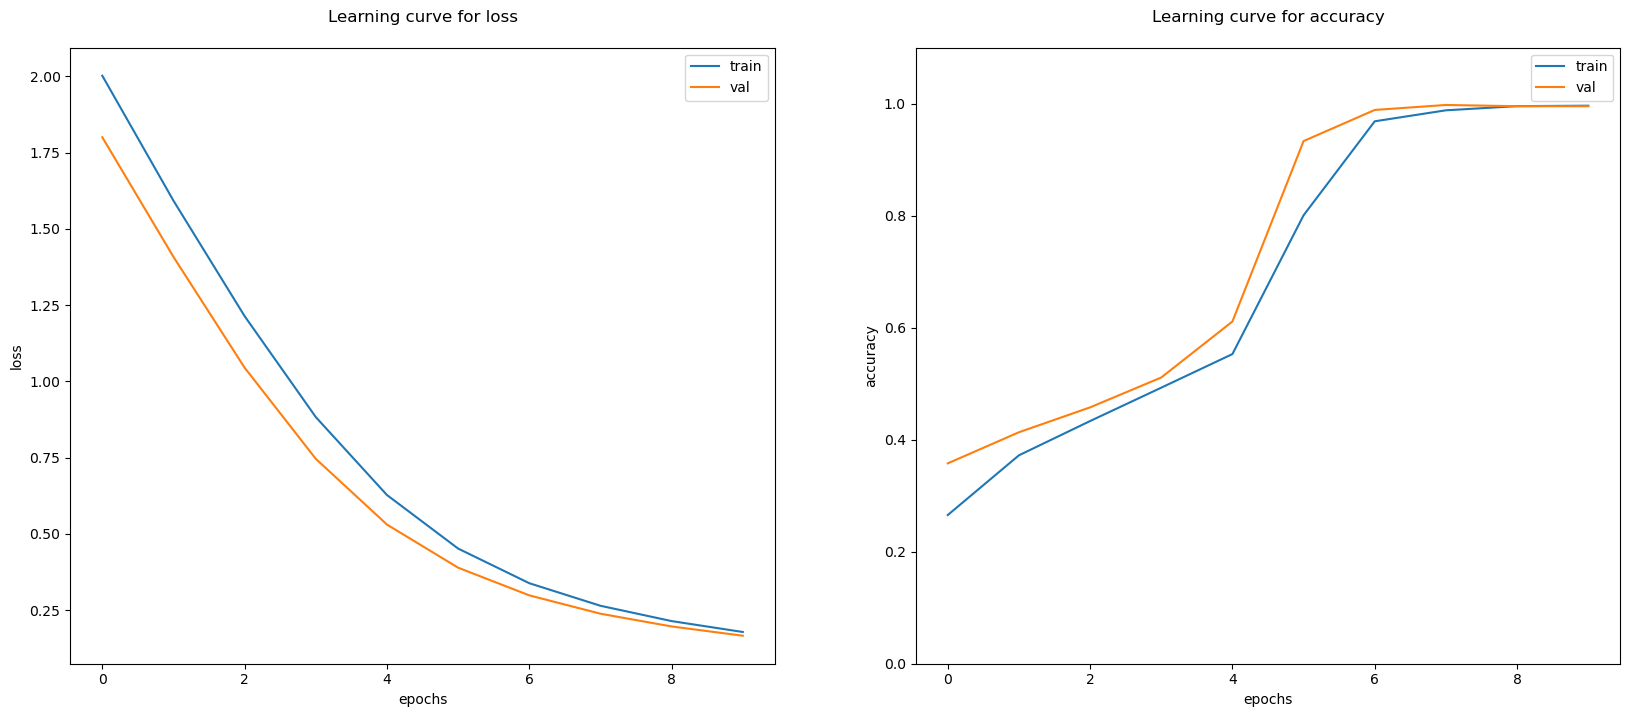

In [14]:
plot_lc(history=history)

In [15]:
y_pred_range = model.predict(X_test)

print(y_pred_range[:10])

y_pred = np.round(y_pred_range,0) # y_pred_range >= 0.5
print(y_pred[:10])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0.09597123]
 [0.04912949]
 [0.8327781 ]
 [0.29906705]
 [0.05622683]
 [0.04110385]
 [0.07115241]
 [0.06531552]
 [0.02098407]
 [0.05910279]]
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


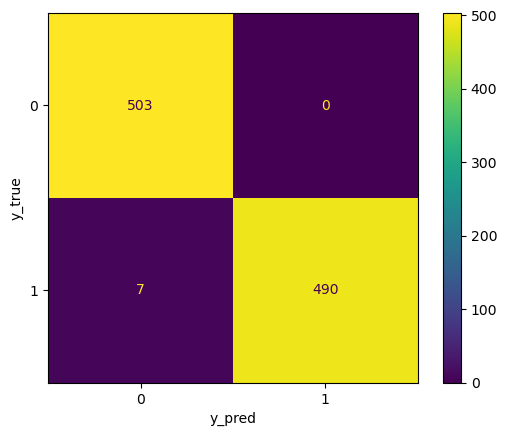

In [16]:
plot_cm_display(y_true=y_test,y_pred=y_pred)

# 2nd model

In [17]:
model_2 = simple_model_definition()
model_2.fit(X_train, y_train, batch_size=8, validation_split=0.15, epochs=10 )

history = model_2.history.history
display(model_2.summary())


Epoch 1/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7196 - loss: 0.6283 - val_accuracy: 0.9222 - val_loss: 0.5113
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9525 - loss: 0.4181 - val_accuracy: 0.9600 - val_loss: 0.3646
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9741 - loss: 0.3096 - val_accuracy: 0.9689 - val_loss: 0.2869
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9784 - loss: 0.2449 - val_accuracy: 0.9756 - val_loss: 0.2339
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9824 - loss: 0.1993 - val_accuracy: 0.9778 - val_loss: 0.1939
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.1647 - val_accuracy: 0.9822 - val_loss: 0.1623
Epoch 7/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.1374 - val_accuracy: 0.9844 - val_loss: 0.1366
Epoch 8/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.1153 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ my-first-hidden-layer     │ (None, 3)           │          9 │
│ (Dense)                   │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ my-second-hidden-layer    │ (None, 2)           │          8 │
│ (Dense)                   │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ my-output-layer (Dense)   │ (None, 1)           │          3 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 62 (252.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42 (172.00 B)

None

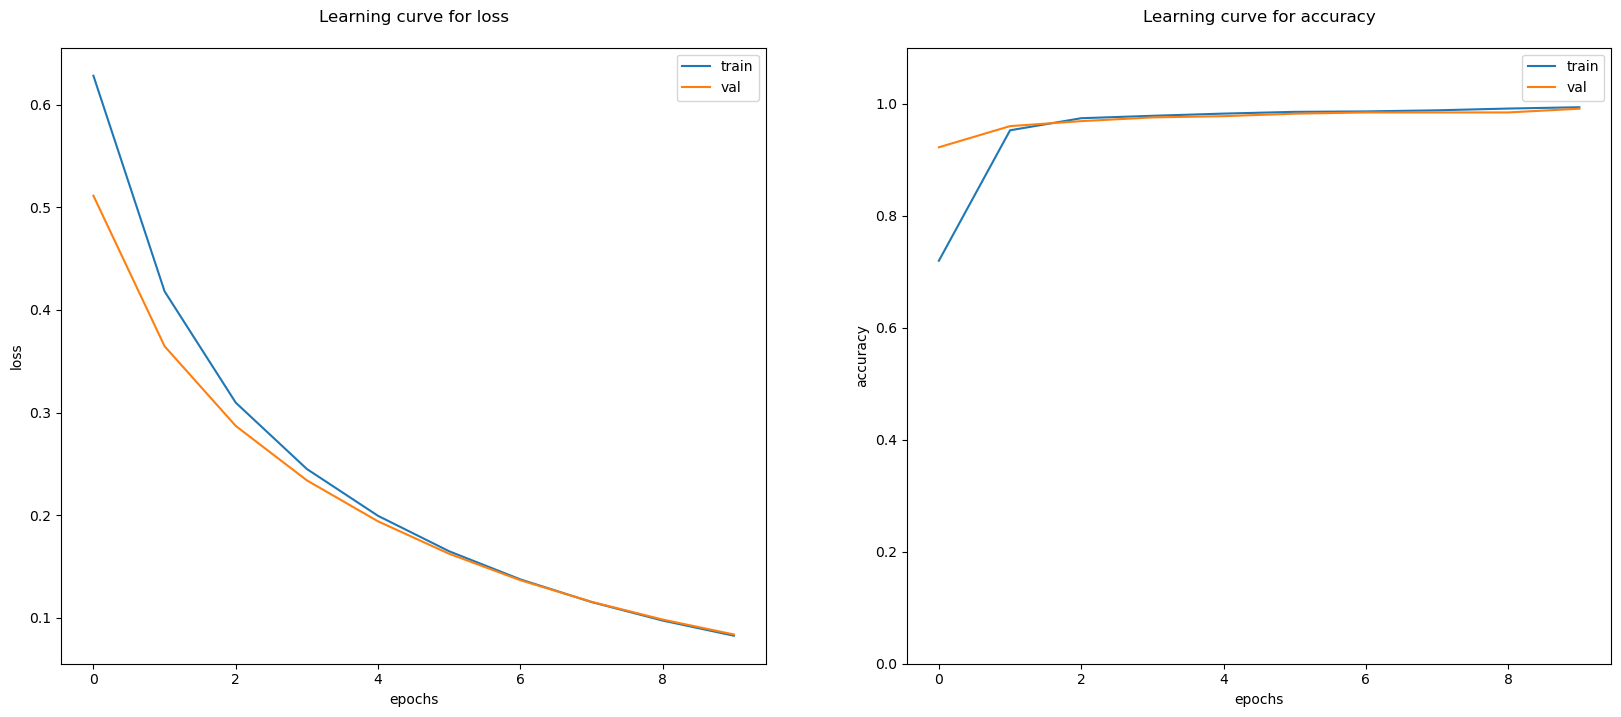

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


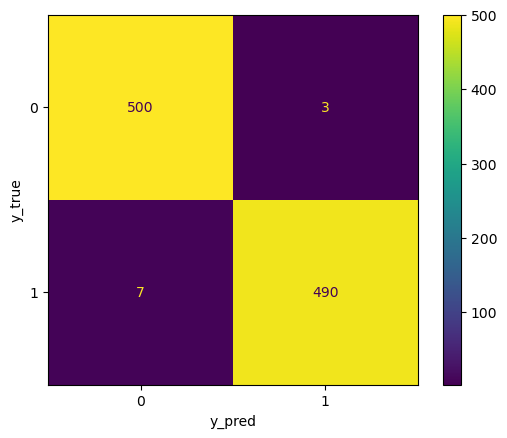

In [18]:
plot_lc(history=history)

y_pred_range = model_2.predict(X_test)

#print(y_pred_range)

y_pred = np.round(y_pred_range,0)
#print(y_pred)
plot_cm_display(y_true=y_test,y_pred=y_pred)

# ellipis data no hidden

In [19]:
model_3 = simple_model_definition_no_hidden()
model_3.fit(X_train_ell, y_train_ell, batch_size=16, validation_split=0.15, epochs=30 )

history = model_3.history.history
display(model_3.summary())


Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5137 - loss: 1.0185 - val_accuracy: 0.4889 - val_loss: 0.9183
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5122 - loss: 0.8516 - val_accuracy: 0.4933 - val_loss: 0.7824
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5161 - loss: 0.7472 - val_accuracy: 0.5022 - val_loss: 0.7155
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5239 - loss: 0.7057 - val_accuracy: 0.5156 - val_loss: 0.6963
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5506 - loss: 0.6956 - val_accuracy: 0.5689 - val_loss: 0.6929
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5749 - loss: 0.6939 - val_accuracy: 0.5822 - val_loss: 0.6924
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5890 - loss: 0.6937 - val_accuracy: 0.5778 - val_loss: 0.6924
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5820 - loss: 0.6937 - val_accuracy: 0.5822 - val_loss:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ my-output-layer (Dense)   │ (None, 1)           │          3 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

None

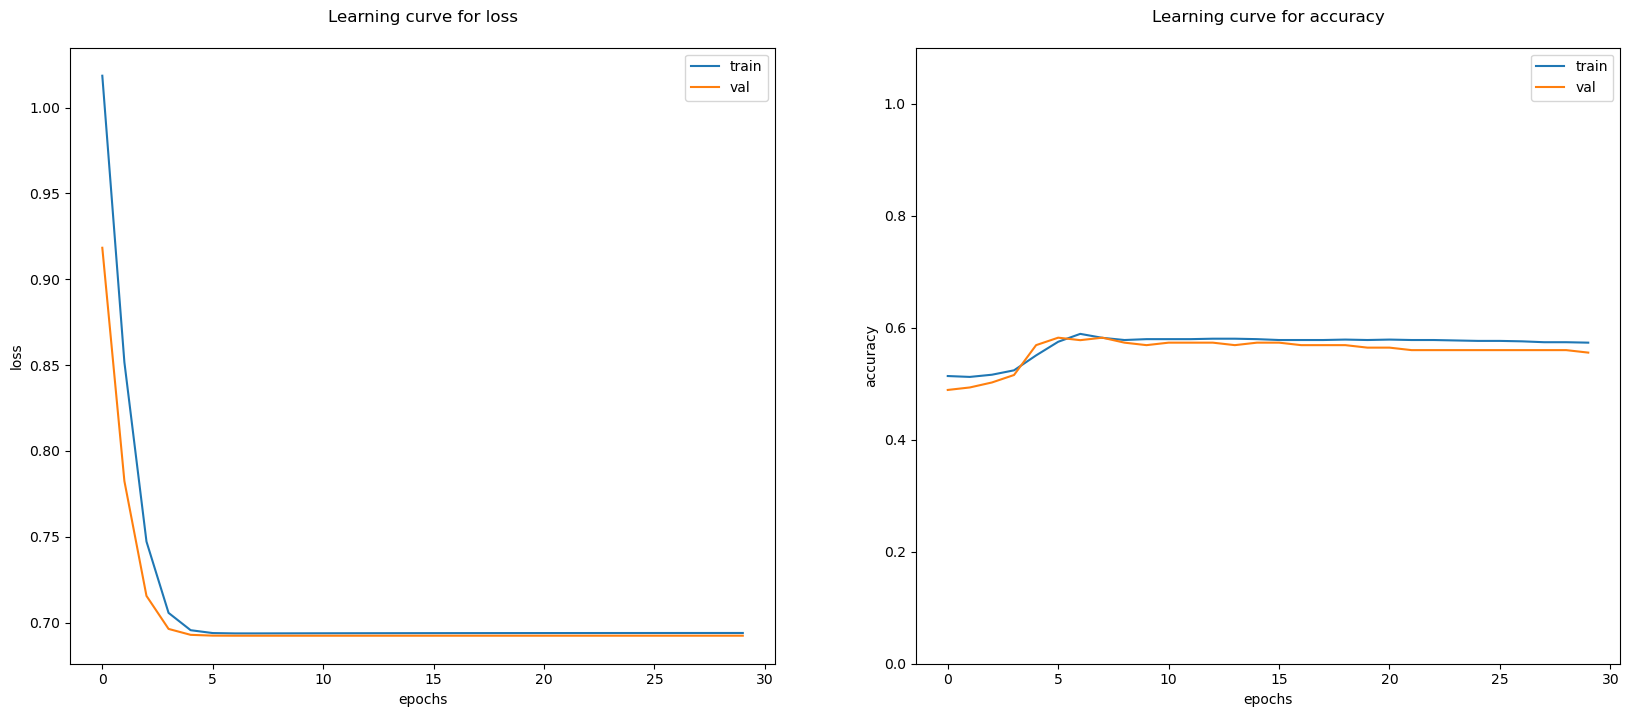

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


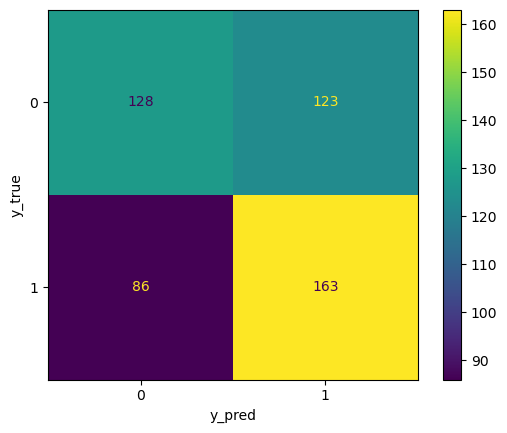

In [20]:
plot_lc(history=history)

y_pred_range = model_3.predict(X_test_ell)

#print(y_pred_range)

y_pred = np.round(y_pred_range,0)
#print(y_pred)
plot_cm_display(y_true=y_test_ell,y_pred=y_pred)

 # ellipsis data hidden layer

In [21]:
model_4 = simple_model_definition()
model_4.fit(X_train_ell, y_train_ell, batch_size=16, validation_split=0.15, epochs=30 )

history = model_4.history.history
display(model_4.summary())

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4933 - loss: 0.6895 - val_accuracy: 0.4800 - val_loss: 0.6861
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5882 - loss: 0.6814 - val_accuracy: 0.6133 - val_loss: 0.6817
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6424 - loss: 0.6742 - val_accuracy: 0.6178 - val_loss: 0.6765
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6565 - loss: 0.6657 - val_accuracy: 0.6356 - val_loss: 0.6687
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6651 - loss: 0.6550 - val_accuracy: 0.6356 - val_loss: 0.6580
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6643 - loss: 0.6420 - val_accuracy: 0.6311 - val_loss: 0.6449
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6706 - loss: 0.6280 - val_accuracy: 0.6356 - val_loss: 0.6313
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6745 - loss: 0.6140 - val_accuracy: 0.6444 - val_loss:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ my-first-hidden-layer     │ (None, 3)           │          9 │
│ (Dense)                   │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ my-second-hidden-layer    │ (None, 2)           │          8 │
│ (Dense)                   │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ my-output-layer (Dense)   │ (None, 1)           │          3 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 62 (252.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42 (172.00 B)

None

In [22]:
model_4.fit(X_train_ell, y_train_ell, batch_size=16, validation_split=0.15, epochs=30)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9631 - loss: 0.1796 - val_accuracy: 0.9600 - val_loss: 0.1917
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9639 - loss: 0.1710 - val_accuracy: 0.9600 - val_loss: 0.1822
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9639 - loss: 0.1624 - val_accuracy: 0.9600 - val_loss: 0.1724
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9647 - loss: 0.1537 - val_accuracy: 0.9600 - val_loss: 0.1627
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9647 - loss: 0.1446 - val_accuracy: 0.9556 - val_loss: 0.1520
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9671 - loss: 0.1348 - val_accuracy: 0.9511 - val_loss: 0.1409
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9733 - loss: 0.1250 - val_accuracy: 0.9644 - val_loss: 0.1293
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.1158 - val_accuracy: 0.9822 - val_loss:

In [23]:
history = model_4.history.history

In [24]:
history

{'accuracy': [0.9631372690200806,
  0.9639215469360352,
  0.9639215469360352,
  0.9647058844566345,
  0.9647058844566345,
  0.9670588374137878,
  0.9733333587646484,
  0.9890196323394775,
  0.9937254786491394,
  0.9960784316062927,
  0.9960784316062927,
  0.9968627691268921,
  0.9968627691268921,
  0.9992156624794006,
  0.9992156624794006,
  0.9992156624794006,
  0.9992156624794006,
  0.9992156624794006,
  0.9992156624794006,
  0.9992156624794006,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.17955930531024933,
  0.1710466891527176,
  0.16235311329364777,
  0.15367154777050018,
  0.1446463018655777,
  0.1348198652267456,
  0.12497986108064651,
  0.11575980484485626,
  0.10685102641582489,
  0.09898682683706284,
  0.09189905971288681,
  0.08561975508928299,
  0.07995641231536865,
  0.07487985491752625,
  0.07031504064798355,
  0.06613518297672272,
  0.06215487793087959,
  0.05858214199542999,
  0.05527045205235481,
  0.05227898061275482,
  0.04948891

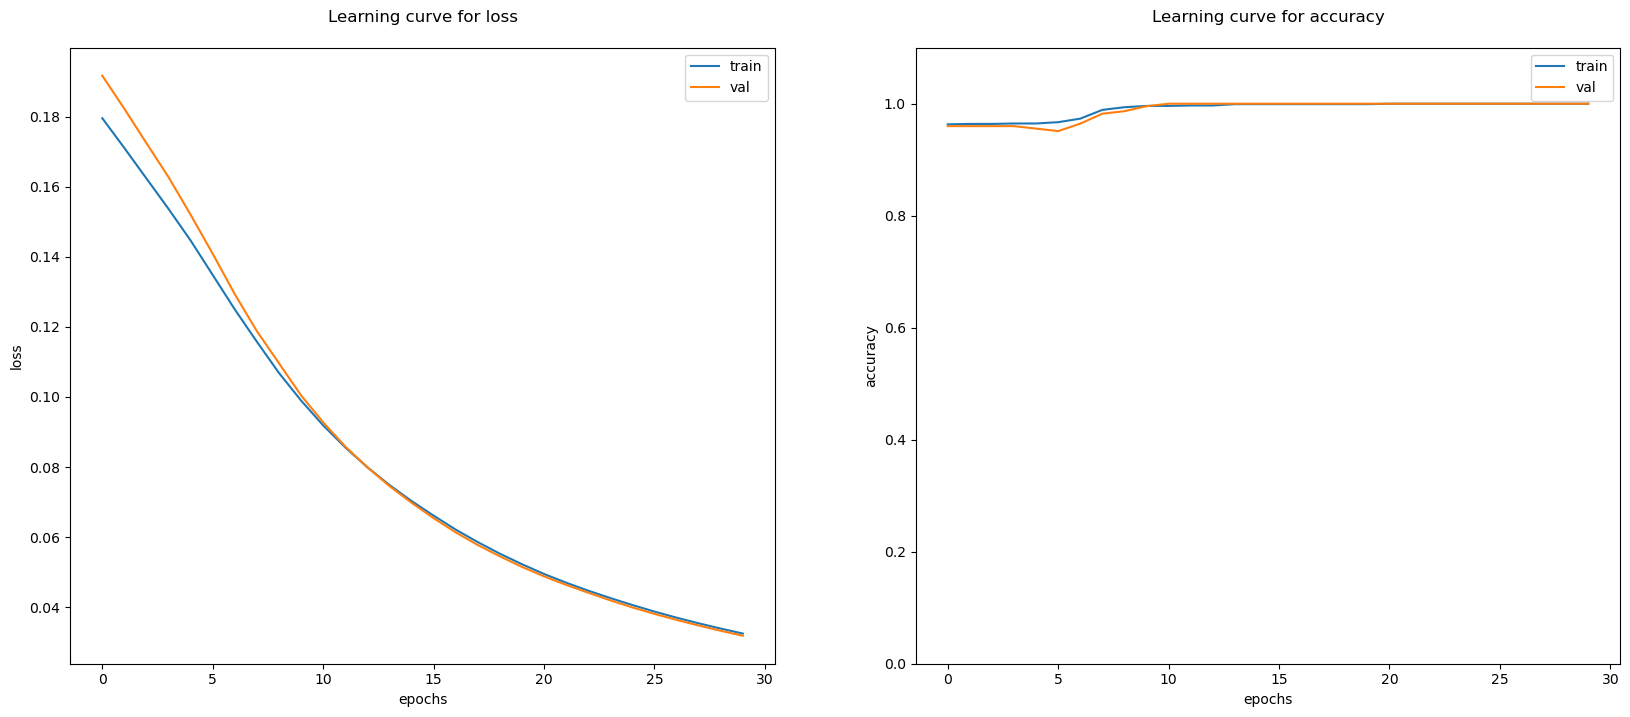

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


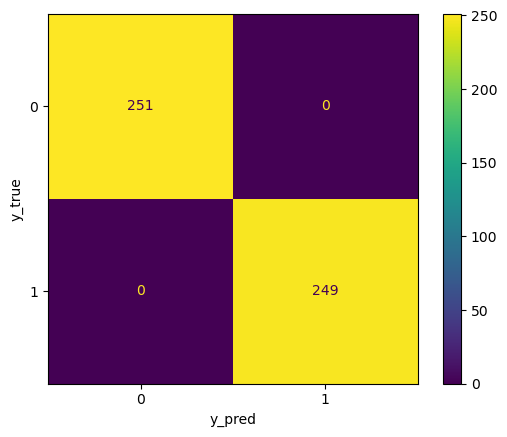

In [25]:

plot_lc(history= history)

y_pred_range = model_4.predict(X_test_ell)

#print(y_pred_range)

y_pred = np.round(y_pred_range,0)
#print(y_pred)
plot_cm_display(y_true=y_test_ell,y_pred=y_pred)

In [26]:
model_5 = mymodel(hidden_shape=(3,4), activation='tanh')
model_5.fit(X_train_ell, y_train_ell, batch_size=16, validation_split=0.15, epochs=30 )

history = model_5.history.history
display(model_5.summary())

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5561 - loss: 0.6894 - val_accuracy: 0.5778 - val_loss: 0.6840
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 0.6724 - val_accuracy: 0.7244 - val_loss: 0.6653
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7357 - loss: 0.6515 - val_accuracy: 0.7689 - val_loss: 0.6410
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7655 - loss: 0.6226 - val_accuracy: 0.8000 - val_loss: 0.6088
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8180 - loss: 0.5852 - val_accuracy: 0.8222 - val_loss: 0.5703
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8565 - loss: 0.5414 - val_accuracy: 0.8444 - val_loss: 0.5266
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8698 - loss: 0.4919 - val_accuracy: 0.8578 - val_loss: 0.4772
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8769 - loss: 0.4379 - val_accuracy: 0.8756 - val_loss:

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)             │ (None, 4)           │         12 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 4)           │         20 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_2 (Dense)           │ (None, 4)           │         20 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_3 (Dense)           │ (None, 1)           │          5 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 173 (696.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116 (468.00 B)

None

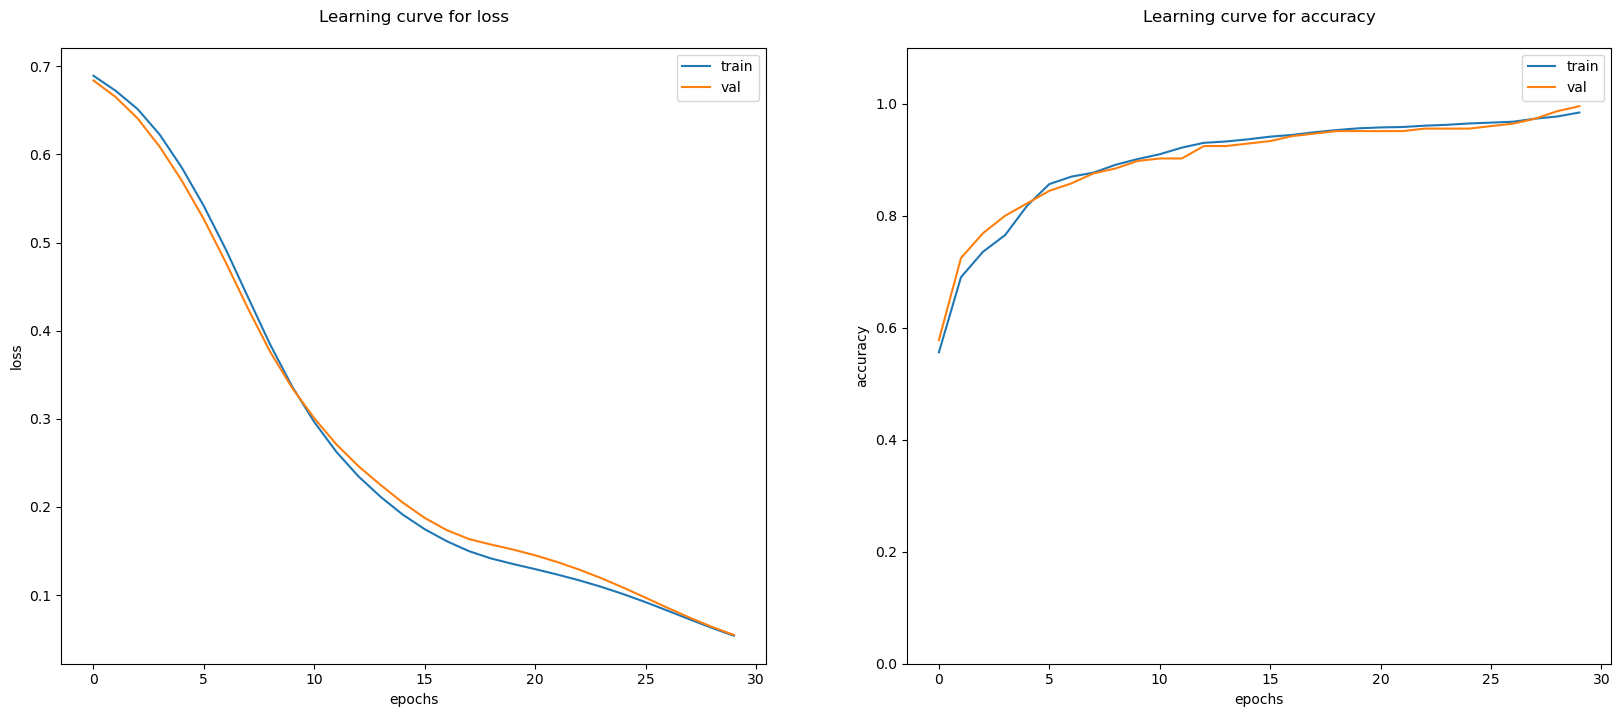

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


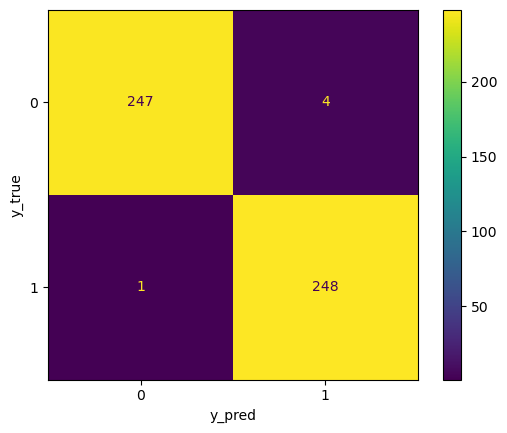

In [27]:
plot_lc(history=history)

y_pred_range = model_5.predict(X_test_ell)

#print(y_pred_range)

y_pred = np.round(y_pred_range,0)
#print(y_pred)
plot_cm_display(y_true=y_test_ell,y_pred=y_pred)